# **Tercera Entrega del Proyecto Final**

# Equipo de trabajo

María Rita Drocchi

Rodrigo Palpa Arhuire

Pedro Agustín Echavarría Agote

# Presentación del problema: Segmentación de clientes según sus riesgos o probabilidad de siniestros y primas de seguro.

El dataset usado en este trabajo "insurance.csv" contiene los datos de clientes de una compañía de seguros. Estos datos son relevantes para la compañía ya que contienen información de los riesgos individuales de los asegurado según algunas carácterísticas biológicas y ambientales.

## Objetivos

# El objetivo será crear un modelo predictivo o métodos de aprendizaje automático capaz de detectar las necesidades del cliente usando de patrón el nivel de riesgo de los individuos. Para ello creemos que el mejor método de identificación del tipo de clientes es a través de la segmentación o Clustering, basado en dos puntos: marketing y análisis de riesgos.

Marketing: la segmentación permite a la compañía reconocer características similares en grupo de individuos y por lo tanto ofrecer productos relacionados con la necesidad de estos clientes, además permite crear estrategias que lleguen al público objetivo optimizando recursos de publicidad y de análisis de competencia.

Análisis de riesgos: desde el campo actuarial, reconocer los factores que puedan llevar a una mayor siniestralidad de los asegurados resulta significativo ya que permite a la compañía destinar de manera más óptima las reservas dinerarias y de tarifación para afrontar tales siniestros. Una reserva y tarifación relativamente bajas con respecto a la siniestralidad efectiva provoca un déficit en la atención oportuna y escasez de recursos dinerarios para afrontar los siniestros. Una reserva y tarifación relativamente alta, por el contrario, genera ganancias extraordinarias en el corto plazo pero eventualmente provocará un traslado de clientes a otras aseguradoras que pidan primas menores, además destinar recursos a reserva (sin posibilidad de capitalizar) ocasiona costos de oportunidad no deseados. La segmentación permite al actuario armar portafolios de clientes con similares riesgos y por tanto más predecibles y con tarifación más óptima para cada grupo.

# Data Acquisition

Uno de los principales problemas a las que se enfrentan las compañías de seguros es la incorrecta evaluación de las pólizas derivado de los riesgos de sus clientes. Estos errores implican un exceso de reserva para enfrentar los siniestros o una escasez de recursos para enfrentarlos. Es necesario que las compañías tengan conocimientos de las características de los potenciales clientes para poder ofrecerle una póliza acordar a su nivel de riesgo.

En este trabajo se usarán datos internos de una compañía aseguradora inexistente, los datos fueron sacados de la página de Github (https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv), el cual consiste en un dataset de una compañía médica que provee servicios de atención médica, posee siete variables.

Las columnas son:

 - Age (edad): edad del beneficiario principal.

 - Sex (sexo): contratista de seguros género femenino o masculino.
 
 - BMI (IMC o Índice de Masa Corporal): que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9.

 - Children (niños): Número de niños cubiertos por el seguro de salud / Número de dependientes.

 - Smoker (fumador): si es o no fumador.

 - Region (región): el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

 - Charges (cargos del asegurado): costos médicos individuales facturados por el seguro de salud.

Importación de la librería Pandas

In [ ]:
import pandas as pd

Lectura del set de datos con "read_csv" de Pandas

In [ ]:
df = pd.read_csv("insurance.csv")
df.head(8)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560


In [ ]:
df1 = df
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df1.to_csv("insurance_adv.csv")

Identificación del tipo de variables y búsqueda de datos faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Se observa que no hay datos faltantes por lo que no hay que realizar cambios en la base de datos.

In [ ]:
# Búsqueda de variables booleanas:
print(df.smoker.unique())
print(df.sex.unique())

['yes' 'no']
['female' 'male']


En la data hay cuatro variables de tipo numérico y tres de tipo objeto. Cabe aclarar que las variables 'smoker' y 'sex' son booleanos, pero se mantendrá con la identificación automática de Pandas en tanto no haya un conflicto con esta designación en el transcurso del proyecto.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Se observa que los clientes tienen un rango de edad entre los 18 y los 64 años, con una media de 39 años. En cuanto al bmi, tienen un rango entre los 15,96 y 53,13, con una media de 30,66. 
Por otro lado, se observa que los clientes tienen un maximo de 5 hijos. 
Finalmente, al observar los precios, se aprecia que los clientes pagan entre 1121 y 63770,42 dólares, con una media de 13270 dólares.

# Exploratory Data Analysis (EDA)

Importación de librerias para el análisis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

## Análisis univariado

### Cantidad de hijos

In [ ]:
df['children'].groupby(df["children"]!=0).count()
# "False" en este caso sería la cantidad de individuos sin hijos.

children
False    574
True     764
Name: children, dtype: int64

Se observa que el 42,89% de los clientes no tienen hijos.

A primera vista nos indicaría que casi la mitad de individuos son solteros o en pareja sin hijos, probablemente con una necesidad menor de contratar seguros de vida o de amparo familiar en el corto plazo y con mayor necesidad en contratar seguros patrimoniales.

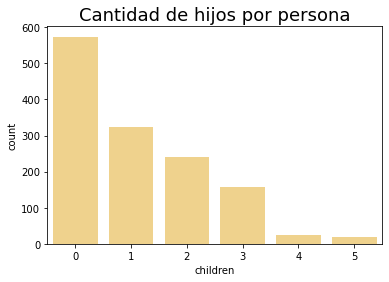

In [ ]:
sns.countplot(x=df['children'], color= "#FFD97D")
plt.title("Cantidad de hijos por persona", fontsize= 18)
plt.show()

### Fumadores

La siniestralidad global esperada del conjunto de individuos con respecto a riesgos derivados de enfermedades pulmonares relacionados con el hábito de fumar es relativamente bajo.

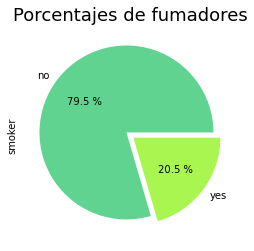

In [ ]:
fumadores = pd.Series.to_frame(df.smoker.value_counts())
colores = ["#60D390","#AAF650"]
desfase = (0.05, 0.05)
fumadores.smoker.plot.pie(autopct="%0.1f %%", colors=colores, explode=desfase)
plt.title('Porcentajes de fumadores', fontsize = 18)
plt.show()

### Regiones

Debido a que desconocemos las características socioambientales de cada región, no es posible definir una relación entre Región y riesgo o necesidades específicas de coberturas.

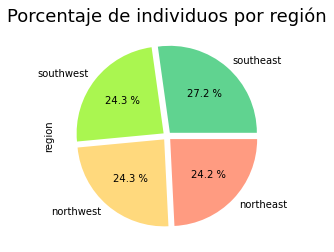

In [ ]:
regiones = pd.Series.to_frame(df.region.value_counts())
colores = ["#60D390","#AAF650","#FFD97D","#FF9B81"]
desfase = (0.05, 0.05, 0.05, 0.05)
regiones.region.plot.pie(autopct="%0.1f %%", colors=colores, explode=desfase)
plt.title('Porcentaje de individuos por región', fontsize= 18)
plt.show()

### Indice de masa corporal

Podemos ver que la variable Indice de masa corporal tiene una densidad con distribución similar a una Normal, a excepción de unos outliers por encima del valor 50. La media de BMI es 30.66 que, según lo indicado en National Center for Chronic Disease Prevention and Health Promotion de Estados Unidos (https://www.cdc.gov/chronicdisease/index.htm), indicaría que más de la mitad de la población estudiada está en la categoría de "Obesos".

C:\Users\XPEA02\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


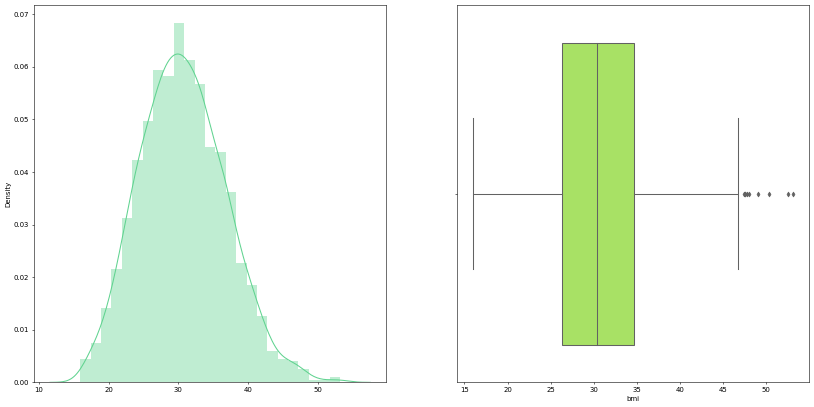

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=2, dpi=50, figsize=(20,10))

plot0=sns.distplot(x=df['bmi'], ax=axes[0], color="#60D390", hist=True)
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout

plot1=sns.boxplot(x=df['bmi'], ax=axes[1], color="#AAF650")
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout

plt.show()

Se observa que más de la mitad de los individuos presentan obesidad.

In [ ]:
df['bmi'].groupby(df["bmi"]>30).count()

bmi
False    633
True     705
Name: bmi, dtype: int64

Creamos una nueva columna (CatBMI) categorizando a los individuos según su nivel de índice de masa corporal.


In [ ]:
condiciones= [(df.bmi<=18.5), 
              (df.bmi>18.5) & (df.bmi<=25),
              (df.bmi>25) & (df.bmi<=30),
              (df.bmi>30)]
elecciones= np.array(('Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad'), dtype="object")
df['CatBMI'] = np.select(condiciones, elecciones, -1)
df

,age,sex,bmi,children,smoker,region,charges,CatBMI
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidad
2,28,male,33.000,3,no,southeast,4449.46200,Obesidad
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesidad
1334,18,female,31.920,0,no,northeast,2205.98080,Obesidad
1335,18,female,36.850,0,no,southeast,1629.83350,Obesidad
1336,21,female,25.800,0,no,southwest,2007.94500,Sobrepeso


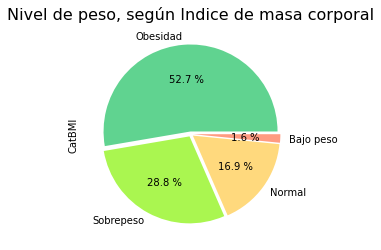

In [ ]:
categoria_bmi = pd.Series.to_frame(df.CatBMI.value_counts())
colores = ["#60D390","#AAF650","#FFD97D","#FF9B81"]
desfase = (0.03, 0.03, 0.03, 0.03)
categoria_bmi.CatBMI.plot.pie(autopct="%0.1f %%", colors=colores, explode=desfase)
plt.title('Nivel de peso, según Indice de masa corporal', fontsize= 16)
plt.show()

## Análisis Bivariado


En esta instancia analizaremos las relaciones entre variables para poder describir mejor la data

### Heatmap


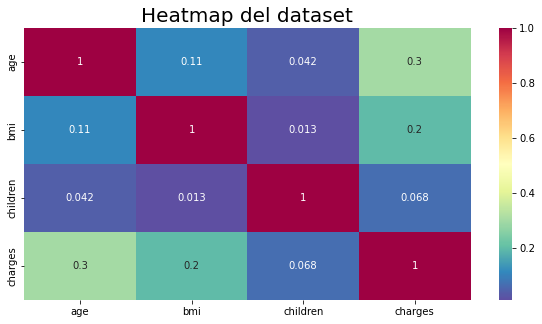

In [ ]:
plt.rcParams['figure.figsize'] =(10,5)

sns.heatmap(df.corr(), annot= True, cmap= 'Spectral_r')
plt.title('Heatmap del dataset', fontsize= 20)
plt.show()

En el heatmap se observan las correlaciones entre variables. En este caso se observan que las variables tienen relaciones débiles entre sí (menores a 0,3).

No todas las variables fueron tomados en cuenta. Esto se debe a que algunas de estas variables son categóricas (como 'sex' y 'region') y boolean (como 'smoke') pero el tipo de variables es object. Entonces, para que sean consideradas, es necesario crear variables numéricas a partir de ellas.

In [ ]:
# Creando nuevas columnas categóricas-numéricas:

# Sexo:
condiciones1= [(df.sex == 'male'), 
              (df.sex == 'female')]
elecciones1= np.array((0, 1), dtype="int64")
df['Sexo'] = np.select(condiciones1, elecciones1, -1)

# Fumador:
condiciones2= [(df.smoker == 'no'), 
              (df.smoker == 'yes')]
elecciones2= np.array((0, 1), dtype="int64")
df['Fumador'] = np.select(condiciones2, elecciones2, -1)

# Región:
condiciones3= [(df.region == 'southeast'), 
              (df.region == 'southwest'),
              (df.region == 'northeast'), 
              (df.region == 'northwest')]
elecciones3= np.array((0, 1, 2, 3), dtype="int64")
df['Region'] = np.select(condiciones3, elecciones3, -1)

df

,age,sex,bmi,children,smoker,region,charges,Sexo,Fumador,Region
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,3
4,32,male,28.880,0,no,northwest,3866.85520,0,0,3
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,3
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,2
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1


Este será nuestro dataset final para analizar. 

Ahora sí podremos hacer un mapa de calor tomando en cuenta estas variables:

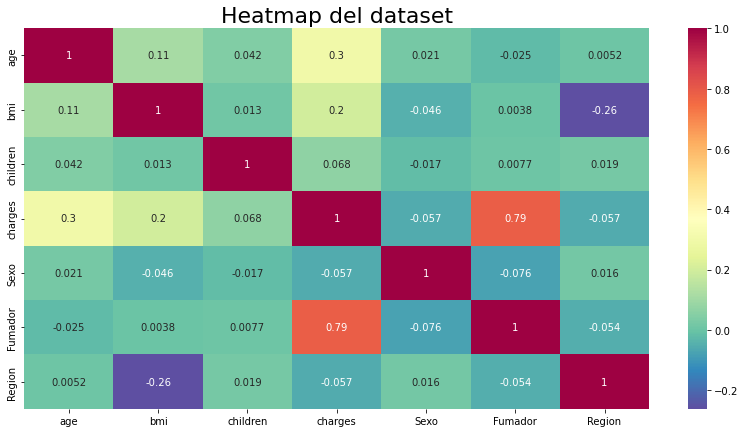

In [ ]:
plt.rcParams['figure.figsize'] =(14,7)

sns.heatmap(df.corr(), annot= True, cmap= 'Spectral_r')
plt.title('Heatmap del dataset', fontsize = 22)
plt.show()

Con este nuevo cuadro de mapa de calor vemos más correlaciones que pueden ser de interés. Nos centraremos en analizar 3 relaciones:

- 'bmi' (índice de masa corporal) con 'Region' (-0,26 que es una relación inversa y moderada)
- 'age' con 'charges' (0,3 relación directa y moderada)
- 'Fumador' con 'charges' (0,79 relación directa y fuerte)

### 1. Relación entre Indice de masa corporal y regiones


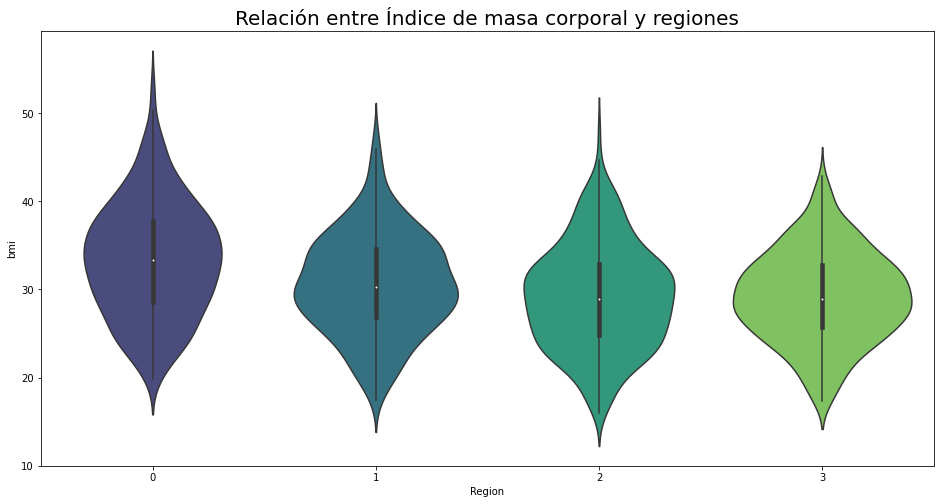

In [ ]:
## 'bmi' vs 'Region'

plt.rcParams['figure.figsize'] = (16,8)
sns.violinplot(x = df['Region'], y = df['bmi'], palette = 'viridis')
plt.title('Relación entre Índice de masa corporal y regiones', fontsize= 20)
plt.show()

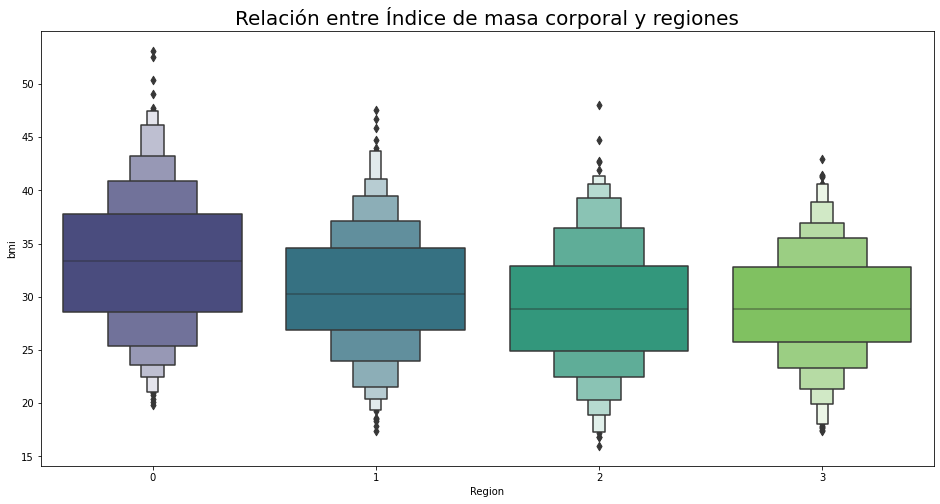

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
sns.boxenplot(x = df['Region'], y = df['bmi'], palette = 'viridis')
plt.title('Relación entre Índice de masa corporal y regiones', fontsize= 20)
plt.show()

La correlación inversa entre 'bmi' y 'Region' en el gráfico de Heatmap de por sí no aporta información numérica relevante entre ambas variables, ya que 'Region' se trata de una variable categórica ordenada de 0 a 3 donde el orden fue armado arbitrariamente. Sin embargo, gráficamente podemos notar diferencias y similitudes entre cada región con respecto a su bmi.

Con respecto a sus similitudes, todas las regiones tienen una bmi con un distribución de valores similares a una normal, con outliers tanto superiores como inferiores, siendo las superiores las que más se alejan de su valor central (correspondiente a valores categorizados como 'obesos' en el trabajo de Análisis univariado).

Como diferencia vemos que los valores centrales de cada Region son distintas entre sí, además que la curtosis de las cuatros son distintas. Por ejemplo, comparando la región '0' (Southeast) con la región 3 (Northwest), vemos que la primera tiene una media mayor que la segunda y que también tiene una tendencia a ser mesocúrtica, en cambio la región Northwest tiende a centrar sus valores, es decir, es leptocúrtica.

### 2. Relación entre edades y costos médicos

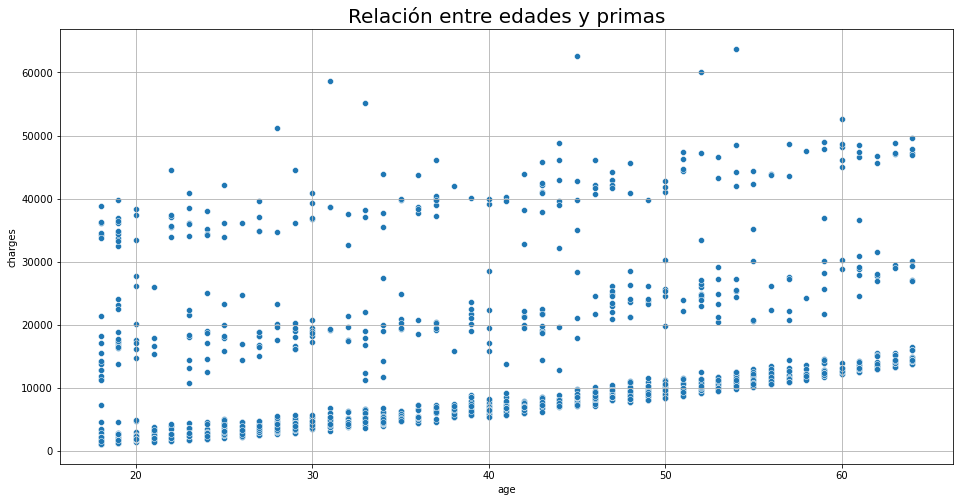

In [ ]:
# 'age' vs 'charges'

sns.scatterplot(x= 'age', y = 'charges', data= df)
plt.title('Relación entre edades y primas', fontsize = 20)
plt.grid()

Tal como vimos en el cuadro de Heatmap, a través del gráfico de dispersión podemos ver la relación directa que tiene la Edad con el Costo. Pero no solamente vemos eso, sino también la aparente existencia de al menos 3 grupos dentro de la problación que puede ajustarse en tres regresiones lineales, con términos constantes y tendencias distintas entre sí. 

### 3. Relación entre fumadores y costos médicos  

In [ ]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


Gráfico de violin para ver las diferencias de primas entre clientes fumadores y no fumadores

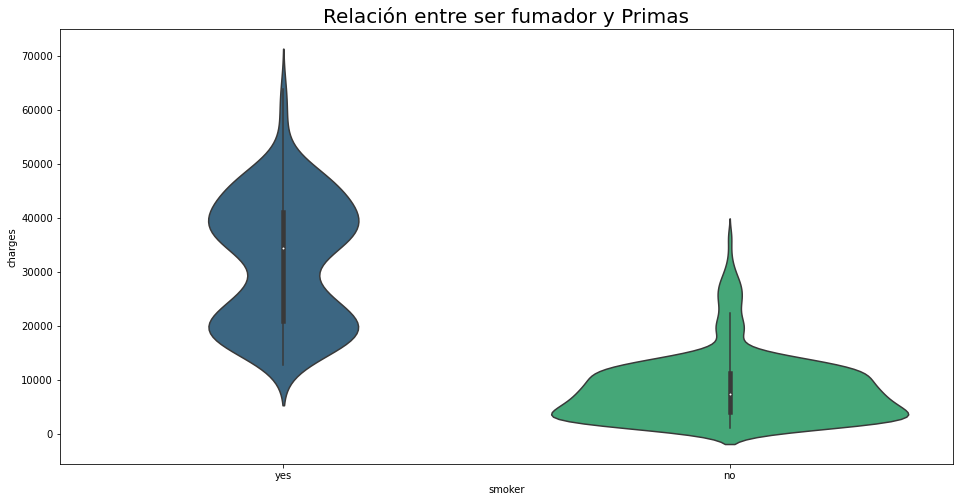

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
sns.violinplot(x= df['smoker'], y=df['charges'], palette= 'viridis')
plt.title('Relación entre ser fumador y Primas', fontsize = 20)
plt.show()

La relación entre prima y siniestralidad esperada es positiva, esto se explica porque a mayor riesgo a sufrir un siniestro de un asegurado, la compañía se cubre del evento con cobrarle una prima mayor que compense la transferencia de perjuicios del individuo a asegurador acordado en el contrato del seguro. Por tanto, es esperable que la compañía tenga interés en saber qué factores actúan como mayores responsables en la concreción de siniestros. Uno de estos factores es la costumbre del asegurado en fumar o no.

Vemos que el factor 'fumador' incide de manera crucial en el valor de la prima pagada por el asegurado. Esto se ve tanto en la diferencia entre las medias, los mínimos y máximos de las primas según la categoría de Fumador o No Fumador. También puede verse el riesgo de fumar en la desviación estándar que es superior si se trata de un fumador.

En el gráfico de violin puede verse con claridad que la distribución de ambas no se asemejan a una normal, en especial a la categoría de 'fumadores' que parece tener dos cimas. Respecto a los 'no fumadores' puede verse que tiene una asimetría positiva, es decir, que la cola de distribución de los valores (Primas) se alarga cuando toma valores más altos (puede decirse que hay una tendencia a que los no fumadores tengan las Primas más bajas).

Boxplot fumadores vs charges para ver las diferencias de primas entre clientes fumadores y no fumadores

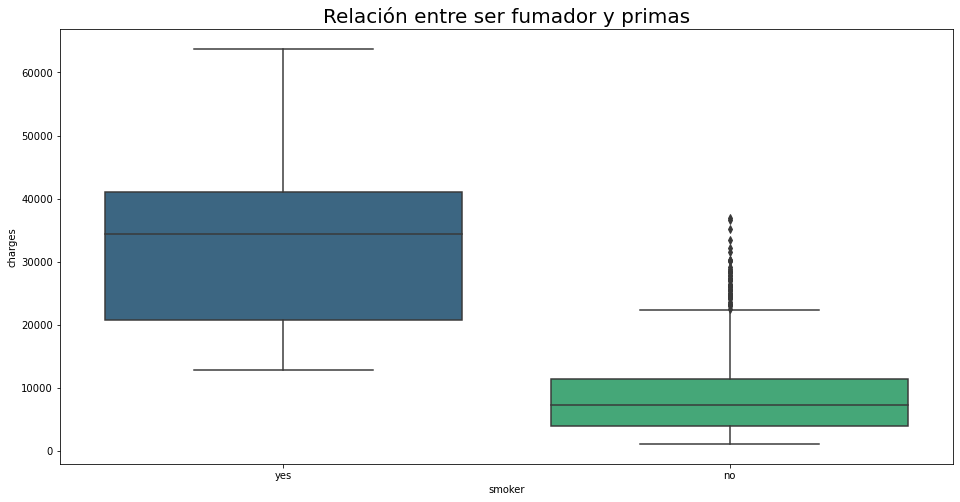

In [ ]:
plt.rcParams['figure.figsize'] = (16,8)
sns.boxplot(x = df['smoker'], y = df['charges'], palette = 'viridis')
plt.title('Relación entre ser fumador y primas', fontsize= 20)
plt.show()

Realizamos un box plot para visualizar la data de una forma mas sencilla. Si bien se observa lo mismo que se explicó con el gráfico de violín, el box plot permite ver que en el caso de los no fumadores hay muchos casos atípicos mientras que en los fumadores no hay ninguno. Esto puede llevar a pensar que pueden haber otros factores que afectan el precio de una poliza de seguro.

## Análisis Multivariado

### Relación entre cantidad de hijos y Charges (Costos), dividido por Regiones

Usando el objeto FaceGrid, tomamos como datos de entrada el dataframe con un diagrama de dispersión relacionando Children (cantidad de hijos) y Charges (Costos), dividiéndolo por las Regiones.



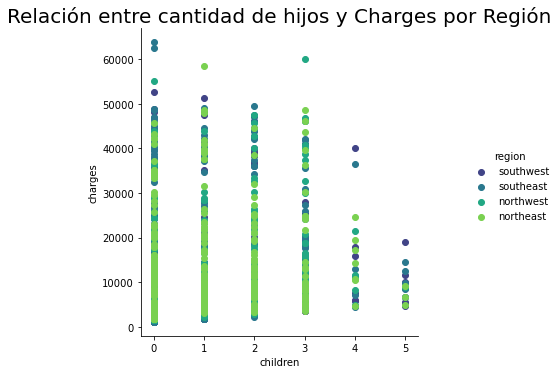

In [ ]:
sns.FacetGrid(df, hue= 'region', height = 5, palette= 'viridis').map(plt.scatter, 'children', 'charges').add_legend();
plt.title('Relación entre cantidad de hijos y Charges por Región', fontsize= 20)
plt.show()

Un análisis visual preliminar nos permite relacionar que las regiones del norte son los que tienen menor cantidad de hijos y los que tienen menor carga por Prima, sin embargo esta información no es concluyente debido a que no existe una divisón clara.

### Relación entre ser fumador y el resto de variables 

Usando el objeto Pairplot, relacionamos la variable 'smoker' (Fumador) con el resto de variables y analizamos qué relaciones importantes podemos encontrar.

Relación entre ser fumador y el resto de las variables


<Figure size 1920x960 with 0 Axes>

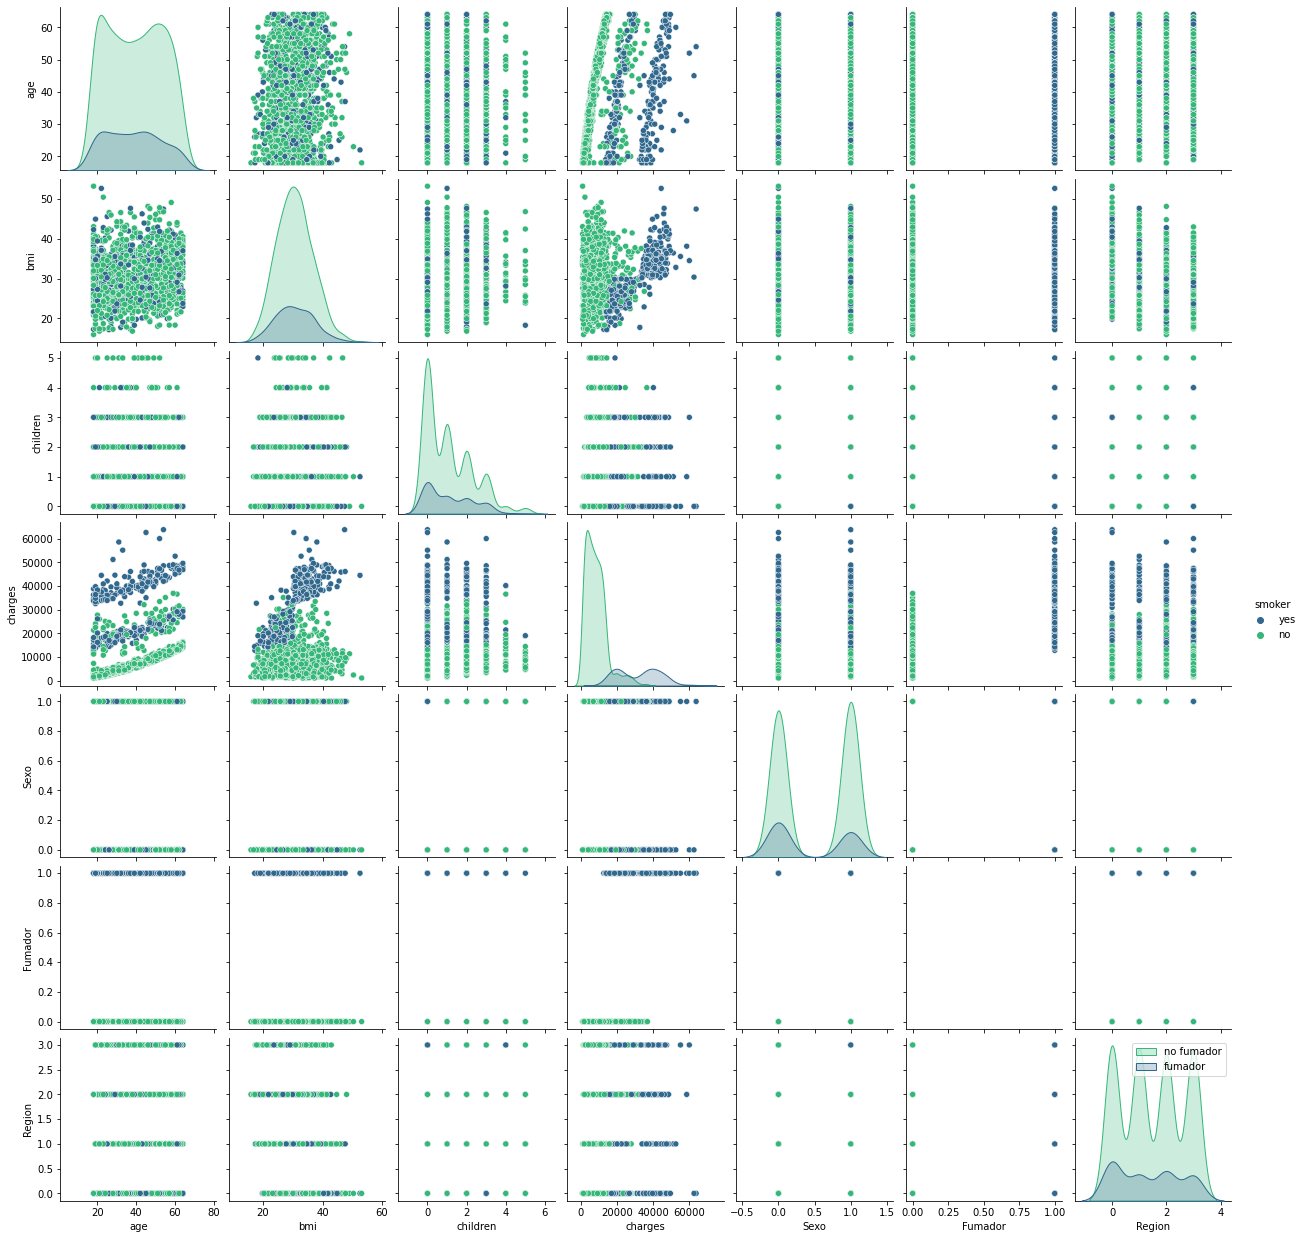

In [ ]:
print('Relación entre ser fumador y el resto de las variables')
plt.figure(dpi= 120)
sns.pairplot(df, hue = 'smoker', palette= 'viridis')
plt.legend(['no fumador', 'fumador'])
plt.show()

Una primera observación interesante se puede ver en el gráfico de frecuencias de Charges (Primas) donde se puede ver claramente que los valores más bajos corresponden casi exclusivamente a las personas No Fumadoras.

Luego, siguiendo el caso de Charges, vemos que los diagramas de dispersión que relacionan esta con edad y BMI tienen patrones que pueden ser de interés. Decido dedicarme a ambos usando el objeto Facegrid.


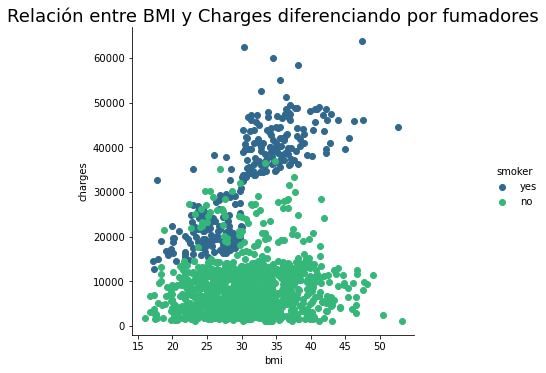

In [ ]:
sns.FacetGrid(df, hue= 'smoker', height = 5, palette= 'viridis').map(plt.scatter, 'bmi', 'charges').add_legend();
plt.title('Relación entre BMI y Charges diferenciando por fumadores', fontsize= 18)
plt.show()

Relacionando BMI y Charges y dividiendo los datos entre los que son fumadores y los que no, puedo distinguir dos patrones. El primero es que, como se vio anteriormente, los No Fumadores son los que tienen menores cargos de Prima indistintamente del BMI que tengan. Pero si se trata de Fumadores, la tendencia entre BMI y Charges se vuelve positiva. Esto nos da un indicio en que ambos factores, BMI y ser fumador, actuando en conjunto, se vuelven en factores determinantes del valor de Charges.

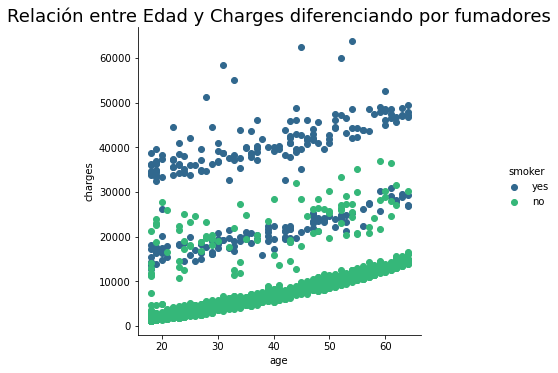

In [ ]:
sns.FacetGrid(df, hue= 'smoker', height = 5, palette= 'viridis').map(plt.scatter, 'age', 'charges').add_legend();
plt.title('Relación entre Edad y Charges diferenciando por fumadores', fontsize= 18)
plt.show()

Esta vez, relacionando Edad y Charges, vemos que tienen una correlación positiva y que los No Fumadores se separan de los Fumadores de manera clara al evaluar los cargos de Prima. Podemos concluir entonces, que el factor edad tiene una relación directa con el aumento de Primas y a su vez, como se vió anteriormente, el factor Fumador también.

### Relación de Charges (Costos) con el resto de variables:

Usando el objeto Jointplot, relaciones Charges con el resto de variables, analizando su tendencia y correlación.

Join plot de Charges (Costos) con otras variables --> 

Correlacion entre Costos y age --> 0.299008193330648


<Figure size 500x400 with 0 Axes>

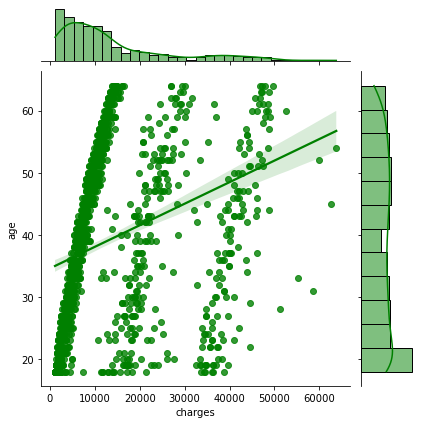

Correlacion entre Costos y bmi --> 0.19834096883362912


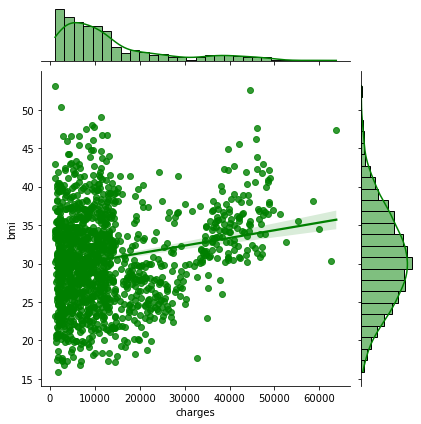

Correlacion entre Costos y children --> 0.06799822684790495


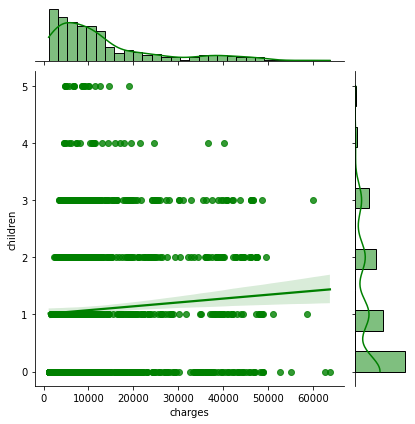

Correlacion entre Costos y Sexo --> -0.05729206220202545


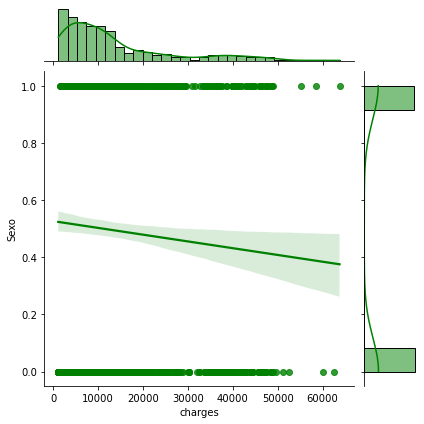

Correlacion entre Costos y Fumador --> 0.7872514304984766


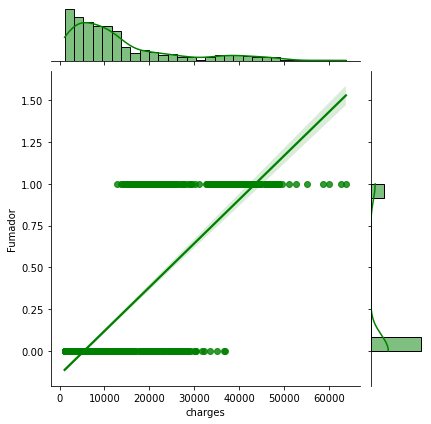

Correlacion entre Costos y Region --> -0.056992781092419176


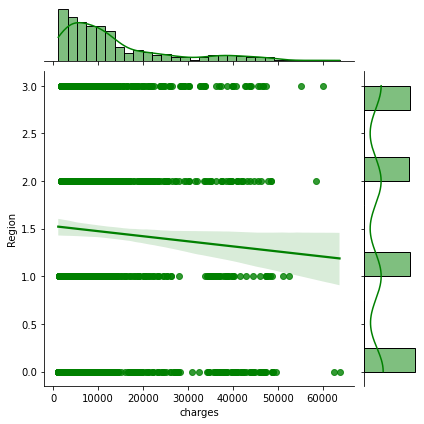

In [ ]:
col = list(df.columns)
idx = col.index('charges')

plt.figure(dpi= 100, figsize=(5,4))
print("Join plot de Charges (Costos) con otras variables --> \n")

for i in df.columns:
    if i != 'charges' and i != 'sex' and i != 'smoker' and i != 'region' and i != 'CatBMI':
        print(f"Correlacion entre Costos y {i} -->", df.corr().loc['charges'][i])
        sns.jointplot(x= 'charges', y= i, data= df, kind = 'reg', color= 'green')
        plt.show()

La correlación entre Charges y Fumador es de 0.79 con tendencia positiva, siendo la mayor correlación existente entre las variables. Le sigue la variable Age con una correlación positiva de 0.30 la cual también resulta ser significativa. Por último, la correlación entre Charges y BMI con un valor de 0.20 es la tercera en importancia, y como vimos anteriormente, el factor Fumador y BMI son factores que en conjunto son decisivos para el aumento de los costos facturados.

# Algoritmos de entrenamiento

Los siguientes algoritmos de entrenamiento se basan en el aprendizaje supervisado.

## Elección de variable Target

Habiendo visto los análisis EDA, vimos que existen una relación más relevante de algunas variables por sobre otras, por ejemplo, existen correlaciones importantes entre  los Costos y las variables Fumador y BMI.

Tal como dijimos al principio del trabajo, nuestro objetivo es hallar una forma eficiente de medir el riesgo individual de cada individuo. Este nivel de riesgo puede estar asociado con los Costos médicos de los pacientes (Charges) ya que suponemos que un paciente con mayores riesgos médicos supone un incrementos en el uso de los servicios médicos que le otorga su seguro. Por lo tanto, asociaremos el riesgo médico con Costos (Charges) clasificando esta variable en dos valores: Normal y Alto.

### Clasificación de la variable Target

C:\Users\XPEA02\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


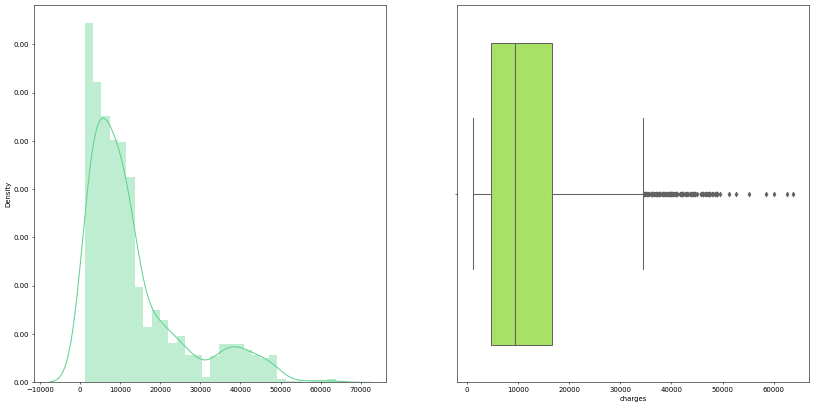

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols=2, dpi=50, figsize=(20,10))

plot0=sns.distplot(x=df['charges'], ax=axes[0], color="#60D390", hist=True)
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout

plot1=sns.boxplot(x=df['charges'], ax=axes[1], color="#AAF650")
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout

plt.show()

Vemos que la distribución de Charges es asimétrica, con una tendencia importante a acumular valores entre 0 y 15000. Luego, puede verse gráficamente que cae en su densidad y vuelve a subir en alrededor de 40000, que visto con el gráfico de caja, son tomados como outliers.

Dada esta distribución de los datos, arbitrariamente vamos a categorizar la variable Charges en dos niveles: normal y alto.

- Normal (0): para valores de Charges que estén entre 0 y 25000.
- Alto (1): para valores de Charges que estén de 25000 en adelante.

In [ ]:
condiciones= [(df.charges<=25000), 
              (df.charges>25000)]
elecciones= np.array((0, 1), dtype="int64")
df['CatRiesgo'] = np.select(condiciones, elecciones, -1)
df

,age,sex,bmi,children,smoker,region,charges,Sexo,Fumador,Region,CatRiesgo
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,3,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,3,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,2,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0


### Cantidad de valores de la clasificación del riesgo

In [ ]:
df.CatRiesgo.value_counts()

0    1137
1     201
Name: CatRiesgo, dtype: int64

Text(0, 0.5, 'Bmi')

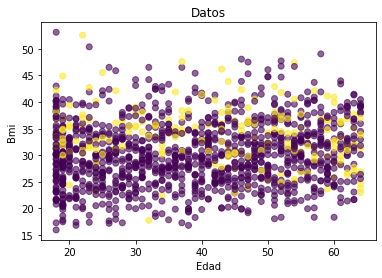

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df.age, df.bmi, c = df.CatRiesgo, alpha = 0.6);
ax.set_title("Datos")
plt.xlabel('Edad')
plt.ylabel("Bmi")



## Método KNN

### 1. Importación de librerías

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

### 2. Selección de variables de entrenamiento y de prueba

In [ ]:
X = df[["Sexo", "Fumador", "Region", "age", "bmi", "children"]]
y = df["CatRiesgo"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 656 )

### 3. Escalador

In [ ]:
escalador = MinMaxScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test= escalador.transform(X_test)
X_test

array([[1.        , 0.        , 1.        , 0.80434783, 0.47282755,
        0.4       ],
       [1.        , 1.        , 0.66666667, 0.52173913, 0.19935432,
        0.        ],
       [0.        , 0.        , 1.        , 0.67391304, 0.3424805 ,
        0.6       ],
       ...,
       [1.        , 1.        , 0.        , 0.10869565, 0.33709981,
        0.2       ],
       [1.        , 0.        , 1.        , 0.7173913 , 0.55716976,
        0.4       ],
       [1.        , 0.        , 0.33333333, 0.80434783, 0.36965295,
        0.4       ]])

### 4. Creación del modelo y entrenamiento

In [ ]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(X_train, y_train);

La selección de neighbors a 3 y no un valor más alto se debe a que tratamos con una muestra relativamente chica, por lo que este método funcionará mejor si usa un neighbor chico.

### 5. Predicción

In [ ]:
clasificador.score(X_train, y_train)

0.9604700854700855

In [ ]:
prediccion_knn = clasificador.predict_proba(X_test)
prediccion_knn = pd.DataFrame(data = prediccion_knn)
#prediccion_knn.head(10)

In [ ]:
clasificador.score(X_test, y_test)

0.9328358208955224

In [ ]:
y_predicc1 = clasificador.predict(X_test) 
y_predicc1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 6. Matriz de confusión

[[328   7]
 [ 20  47]]


C:\Users\XPEA02\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


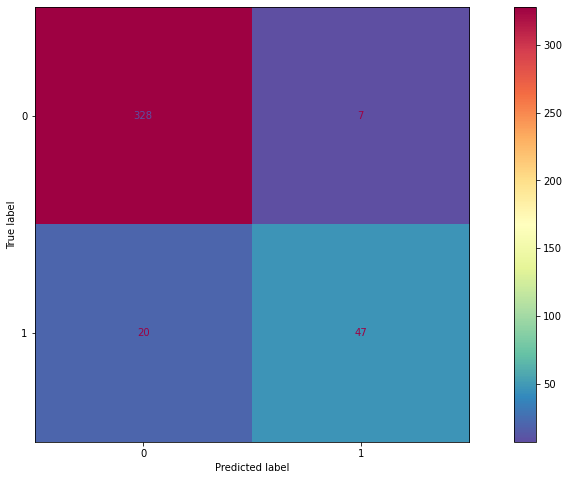

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Matriz de Confusión
print(confusion_matrix(y_test, y_predicc1))

#Ploteamos la Matriz
plot_confusion_matrix(clasificador, X_test, y_test, cmap= 'Spectral_r')
plt.show()

## Método de Regresión Logística

### 1. Importación de librerías

In [ ]:
from sklearn.linear_model import LogisticRegression

### 2. Selección de variables de entrenamiento y de prueba

Para poder comparar los métodos, usaremos la misma separación hecha para el método KNN:

In [ ]:
X = df[["Sexo", "Fumador", "Region", "age", "bmi", "children"]]
y = df["CatRiesgo"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 656 )

### 3. Creación del modelo

In [ ]:
regresion_logistica = LogisticRegression(max_iter= 200)

Agregué el valor max_iter ya que si mantenía el valor predeterminado de 100, me salía una advertencia: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT., que según leí buscando en google, se da cuando los errores por iteración son mayores a la tolerada en el modelo, nos advierte que no el modelo no converge, aún si la puntuación de score fue alta. Por lo que debe aumentarse la cantidad de iteraciones.

###4. Entrenamiento de la regresión logística

In [ ]:
regresion = regresion_logistica.fit(X_train,y_train)

In [ ]:
prediccion_reg = regresion_logistica.predict_proba(X_test)
prediccion_reg = pd.DataFrame(data = prediccion_reg)
prediccion_reg.head(10)

,0,1
0,0.937304,0.062696
1,0.653275,0.346725
2,0.981798,0.018202
3,0.987763,0.012237
4,0.998384,0.001616
5,0.922263,0.077737
6,0.975219,0.024781
7,0.990939,0.009061
8,0.424206,0.575794
9,0.994181,0.005819


In [ ]:
regresion_logistica.score(X_test, y_test)

0.9502487562189055

### 5. Predicción

In [ ]:
y_predicc2 = regresion.predict(X_test)
#y_predicc2

### 6. Matriz de confusión

[[332   3]
 [ 17  50]]


C:\Users\XPEA02\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


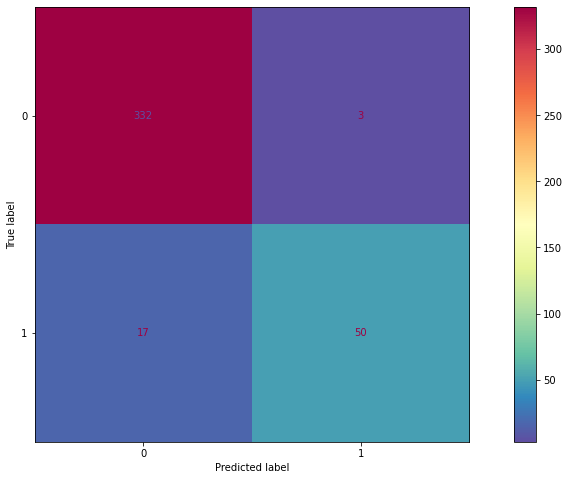

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_predicc2))

#Ploteamos la Matriz
plot_confusion_matrix(regresion, X_test, y_test, cmap= 'Spectral_r')
plt.show()

## Método de Random Forest

### 1. Importación de librerías

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Selección de variables de entrenamiento y de prueba

Para poder comparar los métodos, usaremos la misma separación hecha para el método KNN.

### 3. Creación del modelo y entrenamiento

In [ ]:
model = RandomForestClassifier(random_state=656, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=656)

### 4. Predicción

In [ ]:
y_predicc3 = model.predict(X_test)
y_predicc3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 5. Matriz de confusión


[[335   0]
 [ 14  53]]


C:\Users\XPEA02\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


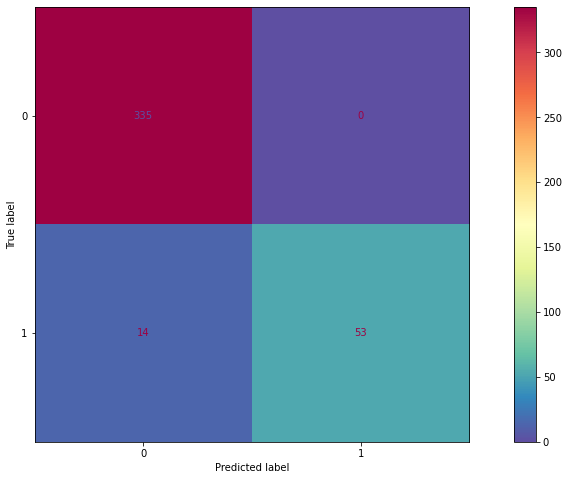

In [ ]:
#Matriz de Confusión
print(confusion_matrix(y_test, y_predicc3))

#Ploteamos la Matriz
plot_confusion_matrix(model, X_test, y_test, cmap= 'Spectral_r')
plt.show()

## Métricas de matriz de confusión

### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy1 = accuracy_score(y_test, y_predicc1)
test_accuracy2 = accuracy_score(y_test, y_predicc2)
test_accuracy3 = accuracy_score(y_test, y_predicc3)

print("Accuracy of the classifier is:")
print("KNN:", round(test_accuracy1, 3))
print("Regresión Logística:", round(test_accuracy2,3))
print("Random Forest:", round(test_accuracy3,3))

Accuracy of the classifier is:
KNN: 0.933
Regresión Logística: 0.95
Random Forest: 0.965


### Precision

In [ ]:
from sklearn.metrics import precision_score

test_precision1 = precision_score(y_test, y_predicc1)
test_precision2 = precision_score(y_test, y_predicc2)
test_precision3 = precision_score(y_test, y_predicc3)

print("Precision of the classifier is:")
print("KNN:", round(test_precision1, 3))
print("Regresión Logística:", round(test_precision2,3))
print("Random Forest:", round(test_precision3,3))

Precision of the classifier is:
KNN: 0.87
Regresión Logística: 0.943
Random Forest: 1.0


### Recall

In [ ]:
from sklearn.metrics import recall_score

test_recall1 = recall_score(y_test, y_predicc1)
test_recall2 = recall_score(y_test, y_predicc2)
test_recall3 = recall_score(y_test, y_predicc3)

print("Recall of the classifier is:")
print("KNN:", round(test_recall1, 3))
print("Regresión Logística:", round(test_recall2,3))
print("Random Forest:", round(test_recall3,3))

Recall of the classifier is:
KNN: 0.701
Regresión Logística: 0.746
Random Forest: 0.791


### F1 Score

In [ ]:
from sklearn.metrics import f1_score

test_f1_1 = f1_score(y_test, y_predicc1)
test_f1_2 = f1_score(y_test, y_predicc2)
test_f1_3 = f1_score(y_test, y_predicc3)

print("F1 score of the classifier is:")
print("KNN:", round(test_f1_1, 3))
print("Regresión Logística:", round(test_f1_2,3))
print("Random Forest:", round(test_f1_3,3))


F1 score of the classifier is:
KNN: 0.777
Regresión Logística: 0.833
Random Forest: 0.883


### ROC curve

KNN

AUC for our classifier is: 0.5


C:\Users\XPEA02\Miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


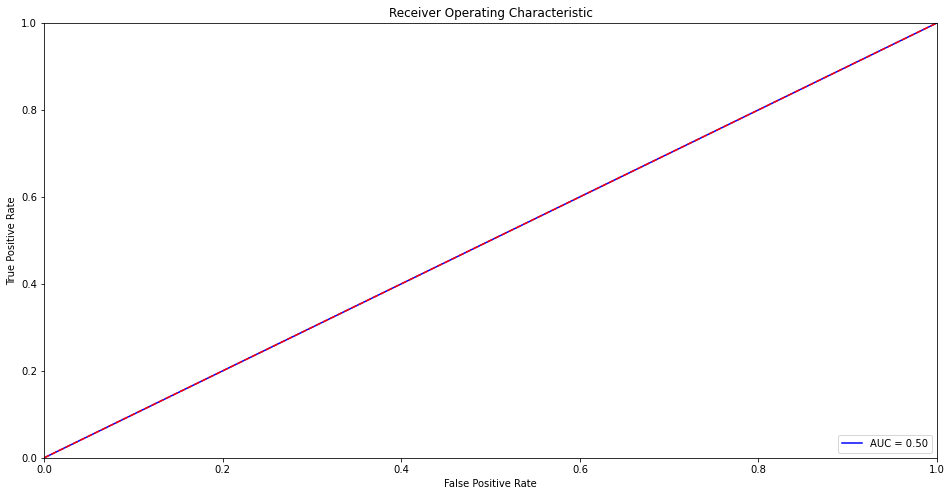

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities1 = clasificador.predict_proba(X_test)
preds1 = class_probabilities1[:, 1]

fpr1, tpr1, threshold1 = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)

# AUC
print(f"AUC for our classifier is: {roc_auc1}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Regresión Logística

AUC for our classifier is: 0.9226999331699711


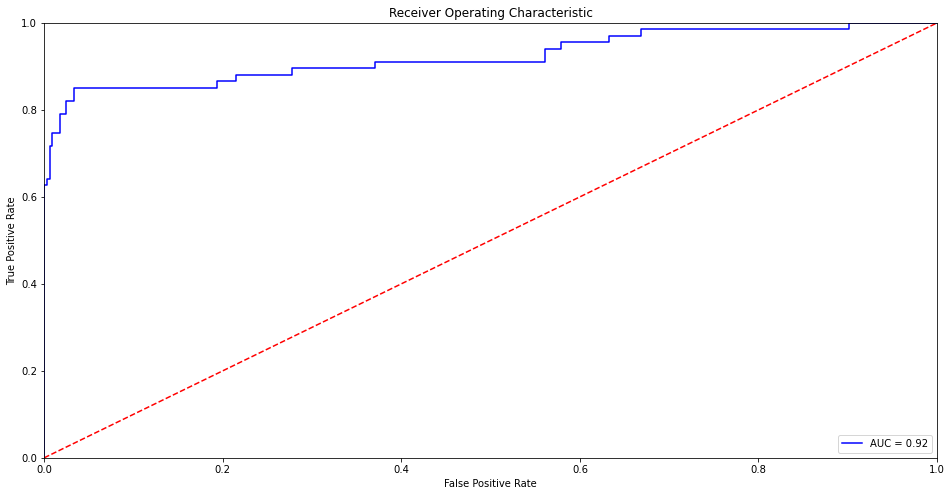

In [ ]:
class_probabilities3 = regresion.predict_proba(X_test)
preds3 = class_probabilities3[:, 1]

fpr3, tpr3, threshold3 = roc_curve(y_test, preds3)
roc_auc3 = auc(fpr3, tpr3)

# AUC
print(f"AUC for our classifier is: {roc_auc3}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

AUC for our classifier is: 0.9242815771886834


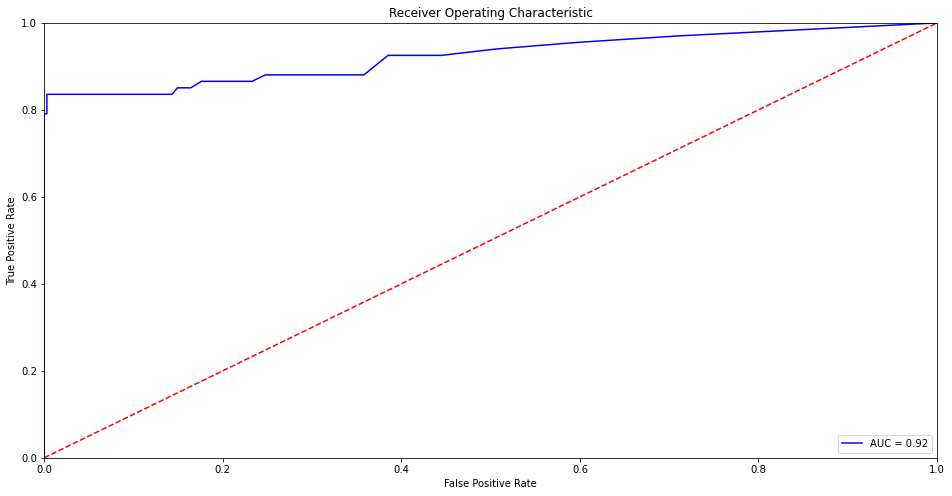

In [ ]:
class_probabilities2 = model.predict_proba(X_test)
preds2 = class_probabilities2[:, 1]

fpr2, tpr2, threshold2= roc_curve(y_test, preds2)
roc_auc2 = auc(fpr2, tpr2)

# AUC
print(f"AUC for our classifier is: {roc_auc2}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Apreciaciones**

Al tratar la variable target como un problema de clasificación binaria, la curva AUC-ROC tiene mayor peso en el rendimiento de modelo de clasificación. En nuestro caso, los métodos Random Forest y Regresión logística poseen valores de AUC-ROC parecidos. Sin embargo, el método Random Forest posee un mayor accuracy score por lo que lo consideramos el mejor modelo para nuestra data.

# Clusters y métricas

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Creacion de K-Means
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
#Calculo de Silhouette
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.398


Se observa que el score es relativamente bajo por lo que se realiza una comparación para definir el número óptimo de clusters.

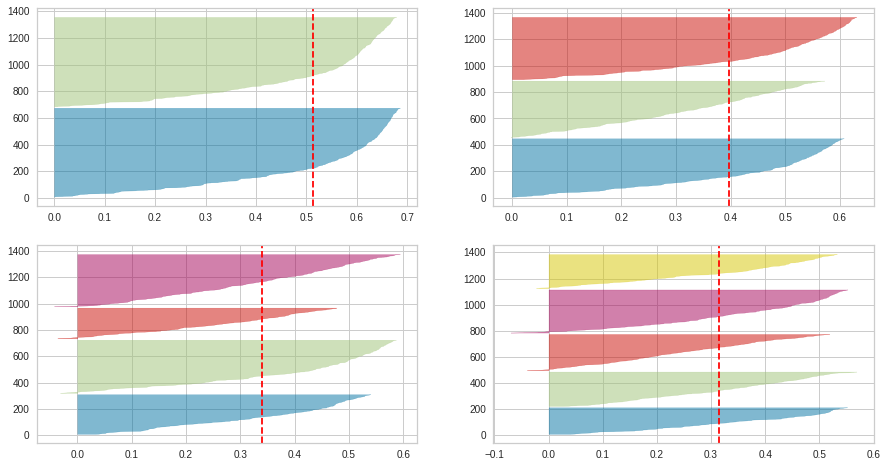

In [ ]:
# Para visualizar el Silhouette
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Se observa que el Silhouette disminuye a medida que aumenta el número de Clusters por lo que es óptimo un análisis con 2 clusters. Para confirmar esto se utiliza el método de codo. 

C:\Users\XPEA02\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


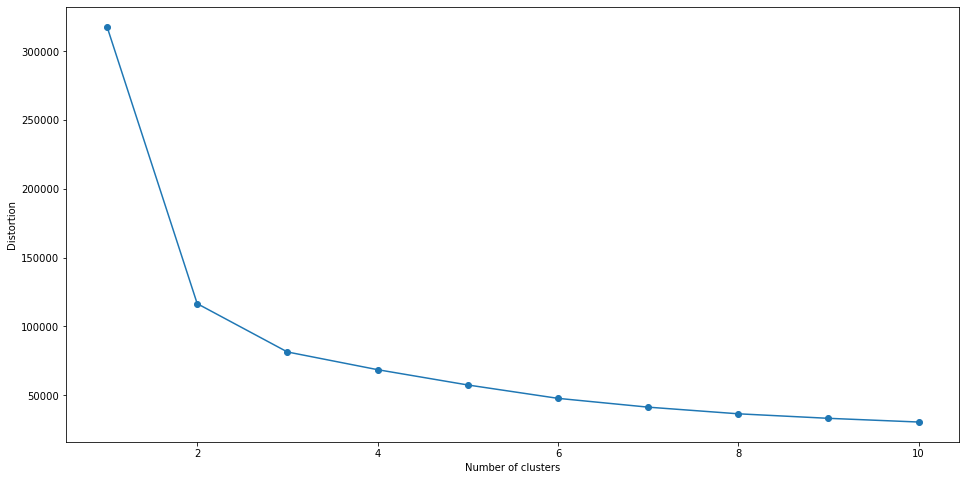

In [ ]:

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        max_iter=300,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# vista gráfica
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Se confirman nuestras sospechas de que el número óptimo de clusters es 2.

In [ ]:
# Se vuelve a realizar un análisis de clusters con n=2

km = KMeans(n_clusters=2, random_state=42)
km.fit_predict(X)

#Calculo de Silhouette
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.512


Para lograr un mejor análisis realizaremos modelos usando la variable numérica "charge" como variable respuesta.

# Regresión Lineal


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# creamos una nueva separación de los datos con "charges" como variable respuesta
X2 = df[["Sexo", "Fumador", "Region", "age", "bmi", "children"]]
y2 = df["charges"]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.30, random_state= 656 )

In [ ]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train);

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X2.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Sexo,545.228270
Fumador,23081.831847
Region,177.604550
age,264.574877
bmi,313.019051
children,644.122567


In [ ]:
#Hacemos nuestras predicciones
y2_pred = regressor.predict(X2_test)
y2_pred

array([14530.30095302, 29524.97105505, 11525.16868398,  9143.69242285,
        1558.9811753 , 16848.02680316, 10652.70518184,  3983.50906098,
       34871.46201813,  4731.97181878, 12086.65355485,  7674.56306364,
        4887.29643954, 15528.87132097,  -493.95028037,  5916.65347689,
       30877.45454304, 11092.85073182,  8048.52355882,  7932.40695686,
       14722.67552467,   789.87706197, 31127.71336875, 38880.36582296,
       25342.08839604, 11438.09596019, 15800.85411468,  9500.04216793,
        -570.83335845,  1607.4253489 ,  6710.5780771 ,  7931.94985776,
        5195.0211871 , 29114.64556736, 12819.62765795, 13374.66135222,
       30574.92932315, 25633.10508416, 14288.71839725,  6371.4494171 ,
        4222.88599922,  -515.23245889, 13879.70359804, 31690.98728781,
       36448.93673327, 28549.25520821,  1265.14482778, 13520.13517492,
        4772.18895568,  3392.4242463 , 15160.482711  ,  5625.78251128,
        2373.50389408, 11169.50966053,  5107.94846331,  9809.6029466 ,
      

In [ ]:
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df2

,Actual,Predicted
862,12269.68865,14530.300953
153,19964.74630,29524.971055
707,10264.44210,11525.168684
744,8827.20990,9143.692423
990,3378.91000,1558.981175
...,...,...
514,21082.16000,30195.720092
1136,7623.51800,7949.028034
1184,18328.23810,26389.619393
718,10848.13430,14453.316168


In [ ]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 4348.421011266224
Mean Squared Error: 41836507.77692531
Root Mean Squared Error: 6468.114700353211


In [ ]:
regressor.score(X2_train,y2_train)

0.7491576160749696

La variable 'charges' tiene valores entre 1121,87 y 63770,42 por lo que el RMSE y el MAE presentan valores aceptables.

# PCA

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X2_train = pca.fit_transform(X2_train)
X2_test = pca.transform(X2_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.21367211, 0.18335763, 0.18003629, 0.15538303, 0.1507254 ,
       0.11682555])

La primera componente explica el 21,36% de los datos, la segunda el 18,33%, la tercera otro 18% y la cuarta un 15,53%. En total esto explicaría el  73,22% de la data por lo que se utilizaran 4 componentes para realizar el análisis.

In [ ]:
pca = PCA(n_components=4)
X2_train = pca.fit_transform(X2_train)
X2_test = pca.transform(X2_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creación del modelo
model_rf = RandomForestRegressor(max_depth=5, random_state=0)
model_rf.fit(X2_train, y2_train)

# Predicción
y2_pred = model_rf.predict(X2_test)

In [ ]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 3764.127975242801
Mean Squared Error: 38404861.771720715
Root Mean Squared Error: 6197.1656240349685


In [ ]:
model_rf.score(X2_test,y2_test)

0.7672188767685152

Se observa que los valores de error son levemente menores a los de la Regresión lineal y que el score (0,767)es mayor al de la regresión también (0,749). Es por esto, que podemos concluir que el PCA funciona mejor con la data que tenemos.


# Modelo de Boosting

Para continuar con el análisis de los datos realizaremos un Gradient Boosting model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.9676616915422885

Se observa que este modelo tiene un mejor score que el resto de los modelos.

# Mejora de modelos

A partir del modelos aplicados anteriormente se intentara mejorar la performance de los mismos aplicando deiferentes tecnicas de mejora de modelos de ML.

Los modelos elegidos fueron dos:

 - <b>Random Forest</b> utilizando como target la variable categoria de riesgo
 - <b>PCA</b> utilizando como target la variable Charges

### Random Forest (LOOCV)

In [ ]:
#Se importan librerias
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [ ]:
X_LOOCV = df[["Sexo", "Fumador", "Region", "age", "bmi", "children"]]
y_LOOCV = df["CatRiesgo"]

In [ ]:
#Se convierten los df en arrays
X_LOOCV=X_LOOCV.values
y_LOOCV=y_LOOCV.values


In [ ]:
#creacion del modelo
cv= LeaveOneOut()


In [ ]:
#se utilizan los mismos parametros que en el RandomForest anterior para facilitar la comparacion de los resultados

model_LOOCV = RandomForestClassifier(random_state=656, n_estimators=200,class_weight="balanced", max_features="log2")


In [ ]:
%%time #dado que LOOCV es un algoritmo bastante lento, se decidie medir el tiempo de ejecucion para ver si los resultados valen la pena
scores_LOOCV = cross_val_score(model_LOOCV, X_LOOCV, y_LOOCV, scoring='accuracy', cv=cv, n_jobs=-1,error_score="raise")


Wall time: 2min 8s


In [ ]:
scores_LOOCV.mean()

0.9648729446935725

Se observa que la media para este Modelo es exactamente iugal que para el caso en el que no se utilizó LOOCV por lo que en el caso de tener mas datos en el futuro, el uso de esta herramienta no parece muy necesario, dado que no se ve una mejora de precision y el tiempo de entrenamiento es varios ordenes de magnitud mayor

### PCA (K-Fold)

In [ ]:
#Se utlizara el modelo K-fold para conformar los grupos de test y train. Se reparten los datos en 11 grupos.
X3 = df[["Sexo", "Fumador", "Region", "age", "bmi", "children"]]
y3 = df["charges"]
from sklearn.model_selection import KFold
X3=X3.values
KFold = KFold(n_splits=11, random_state=0, shuffle=True)
train, test = list(KFold.split(X3))[0]
X3_train = X3[train]
X3_test = X3[test]
y3_train = y3[train]
y3_test = y3[test]

In [ ]:
#De aca en adelante se utilizara el mismo codigo que se utilizo en el punto PCA de la segunda entrega
sc = StandardScaler()
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)
pca = PCA(n_components=4)
X3_train = pca.fit_transform(X3_train)
X3_test = pca.transform(X3_test)
# Creación del modelo
model_rf = RandomForestRegressor(max_depth=5, random_state=0)
model_rf.fit(X3_train, y3_train)

# Predicción
y3_pred = model_rf.predict(X3_test)

In [ ]:
#Evaluación de Modelos
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Mean Absolute Error: 3587.948702202025
Mean Squared Error: 36040418.34141658
Root Mean Squared Error: 6003.367250253526


Si se comparan estos valores de evaluacion de modelos con los obtenidos anteriormente se encuentra una leve mejora en los parametros pero la misma no es muy significativa

In [ ]:
model_rf.score(X3_test,y3_test)

0.8165773424776475

Se puede observar que el Score supera al del PCA utilizado anteriormente con el split 70/30. Siendo este el mayor score de los modelos empleados hasta ahora para la variable charges.